In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define paths
data_file_path = 'v32_Dome-Recommendations-With_Provenance_Verified.tsv'
output_dir = 'Annotation_Graphs'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Set plot style
sns.set_theme(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv(data_file_path, sep='\t')

# Display basic info and first few rows
print(df.info())
display(df.head())

# Columns of interest
cols_of_interest = ['provenance_source', 'annotation_matches_publication_metadata', 'annotation_matches_shortid']
display(df[cols_of_interest].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   _id/$oid                                 270 non-null    object 
 1   dataset/availability                     266 non-null    object 
 2   dataset/provenance                       270 non-null    object 
 3   dataset/redundancy                       242 non-null    object 
 4   dataset/splits                           257 non-null    object 
 5   dataset/done                             127 non-null    float64
 6   dataset/skip                             127 non-null    float64
 7   evaluation/availability                  245 non-null    object 
 8   evaluation/comparison                    251 non-null    object 
 9   evaluation/confidence                    232 non-null    object 
 10  evaluation/measure                       263 non-n

,_id/$oid,dataset/availability,dataset/provenance,dataset/redundancy,dataset/splits,dataset/done,dataset/skip,evaluation/availability,evaluation/comparison,evaluation/confidence,...,updated/$date,uuid,reviewState,shortid,update,__v,score,provenance_source,annotation_matches_publication_metadata,annotation_matches_shortid
0,63516fedb9c880af1f305b5f,?,distinguish 32 patients from 30 healthy control,Independance,distinguish 32 patients from 30 healthy control,4.0,0.0,No,No,No,...,2026-02-02T19:46:52.000Z,55301cf1-e2b8-4e59-86d5-6502872104d6,undefined,ftglxzast4,NaN,NaN,NaN,DOME_JSON,No Match,Match
1,63516fedb9c880af1f305b5b,Yes. https://www.ncbi.nlm.nih.gov/geo/query/ac...,The data set is publicly available\nand descri...,Αll age classes appeared almost equally in bot...,training (n = 75) and validation(n = 66),4.0,0.0,No,comparison of the outcome of seagull to that o...,the results of seagull and SGL were very simil...,...,2026-02-02T19:46:52.000Z,d8f4a424-12a1-40cc-8bde-3f756df2316b,undefined,v4efeulceq,NaN,NaN,NaN,DOME_JSON,No Match,Match
2,63516fedb9c880af1f305b60,"Yes, Supporting information.",Neonatal Intensive Care Unit (NICU) at the Chi...,not reported (there were pre-selection criteri...,"618 infants with 1188 sepsis evaluations, 110 ...",4.0,0.0,"Yes, Supporting information, https://github.co...","Ada boost, Gradient Boosting, kNN, Logistic Re...",NA (The null hypothesis of equal inter-model d...,...,2026-02-02T19:46:52.000Z,92789330-e8c7-4761-a47b-6758bb151af7,undefined,m8bml54z62,NaN,NaN,NaN,DOME_JSON,No Match,Match
3,63516fedb9c880af1f305b2e,yes: https://www.olink.com/application/mgh-cov...,clinical and normalized protein expression pro...,Not commented,only LOOCV was used,4.0,0.0,Confusion matrices in the supplement: http://1...,"None, only the 44 different models used in the...",No,...,2026-02-02T19:46:52.000Z,9f2653e6-d8fb-455a-ac07-31ffd86fbf52,undefined,1de6o2bxxv,NaN,NaN,NaN,DOME_JSON,No Match,Match
4,63a25db2e8edf6ce46f6e84b,"Yes, The MSI data have been deposited to the P...",DESI-MSI experiments of whole mouse kidney and...,Not applicable,Not applicable,4.0,0.0,No,"Yes, our method was compared with two internal...",not applicable,...,2026-02-02T19:46:52.000Z,8c0c94cd-3172-4f65-92b0-b997742324e0,undefined,ck60ijuxvo,NaN,NaN,NaN,DOME_JSON,Match,Match


,provenance_source,annotation_matches_publication_metadata,annotation_matches_shortid
0,DOME_JSON,No Match,Match
1,DOME_JSON,No Match,Match
2,DOME_JSON,No Match,Match
3,DOME_JSON,No Match,Match
4,DOME_JSON,Match,Match


In [5]:
# Check unique values
print("Provenance Source unique values:", df['provenance_source'].unique())
print("Metadata Match unique values:", df['annotation_matches_publication_metadata'].unique())
print("ShortID Match unique values:", df['annotation_matches_shortid'].unique())

Provenance Source unique values: ['DOME_JSON' 'Starting_TSV']
Metadata Match unique values: ['No Match' 'Match' 'Unsure' nan]
ShortID Match unique values: ['Match' 'No Match' 'Unsure' nan]


Saved graph to Annotation_Graphs/publication_metadata_match_vs_provenance.png


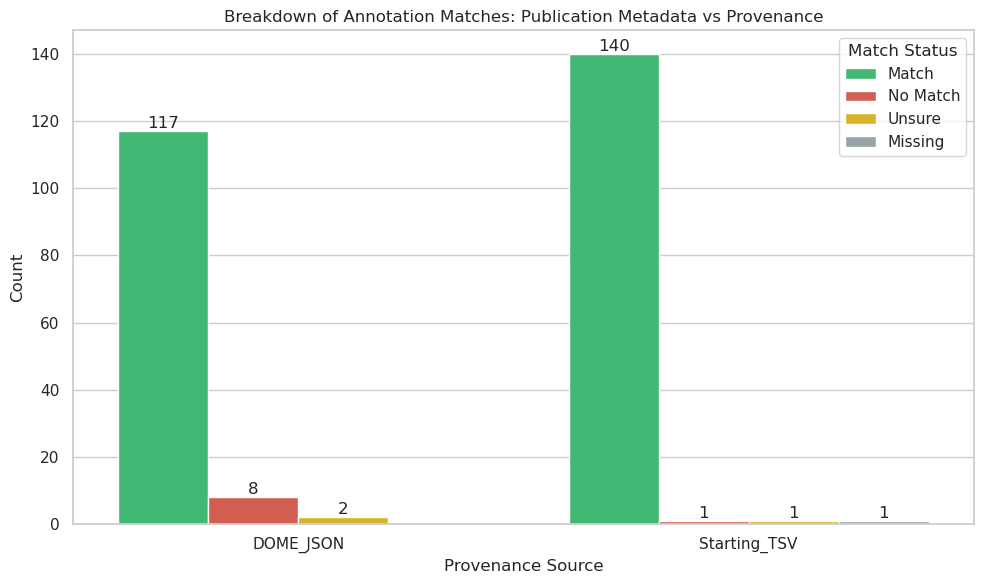

Saved graph to Annotation_Graphs/shortid_match_vs_provenance.png


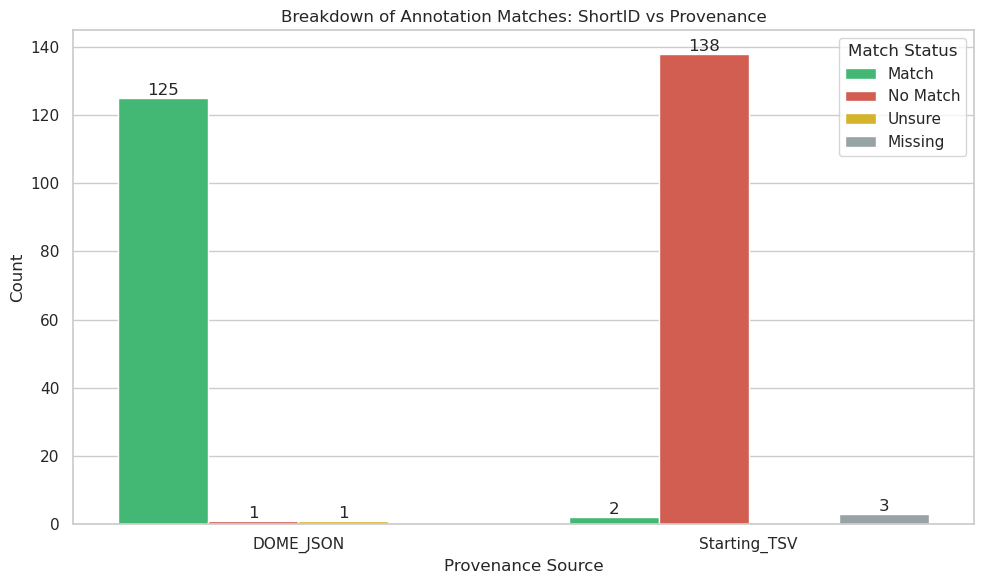

In [10]:
# Handle NaNs for plotting
df_clean = df.copy()
df_clean['annotation_matches_publication_metadata'] = df_clean['annotation_matches_publication_metadata'].fillna('Missing')
df_clean['annotation_matches_shortid'] = df_clean['annotation_matches_shortid'].fillna('Missing')

# Define consistent color palette
match_palette = {
    'Match': '#2ecc71',      # Green
    'No Match': '#e74c3c',   # Red
    'Unsure': '#f1c40f',     # Yellow/Orange
    'Missing': '#95a5a6'     # Gray
}

# Define consistent hue order to ensure legend and bars are always in the same order
hue_order = ['Match', 'No Match', 'Unsure', 'Missing']

# Function to create and save plot
def plot_breakdown(column, title, filename):
    plt.figure(figsize=(10, 6))
    
    # Calculate counts for annotations
    ax = sns.countplot(data=df_clean, x='provenance_source', hue=column, palette=match_palette, hue_order=hue_order)
    
    plt.title(title)
    plt.xlabel('Provenance Source')
    plt.ylabel('Count')
    plt.legend(title='Match Status')
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.tight_layout()
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path)
    print(f"Saved graph to {save_path}")
    plt.show()

# Generate Graph 1: Publication Metadata Match
plot_breakdown(
    'annotation_matches_publication_metadata', 
    'Breakdown of Annotation Matches: Publication Metadata vs Provenance', 
    'publication_metadata_match_vs_provenance.png'
)

# Generate Graph 2: ShortID Match
plot_breakdown(
    'annotation_matches_shortid', 
    'Breakdown of Annotation Matches: ShortID vs Provenance', 
    'shortid_match_vs_provenance.png'
)

Saved combined graph to Annotation_Graphs/combined_annotation_matches_vs_provenance.png


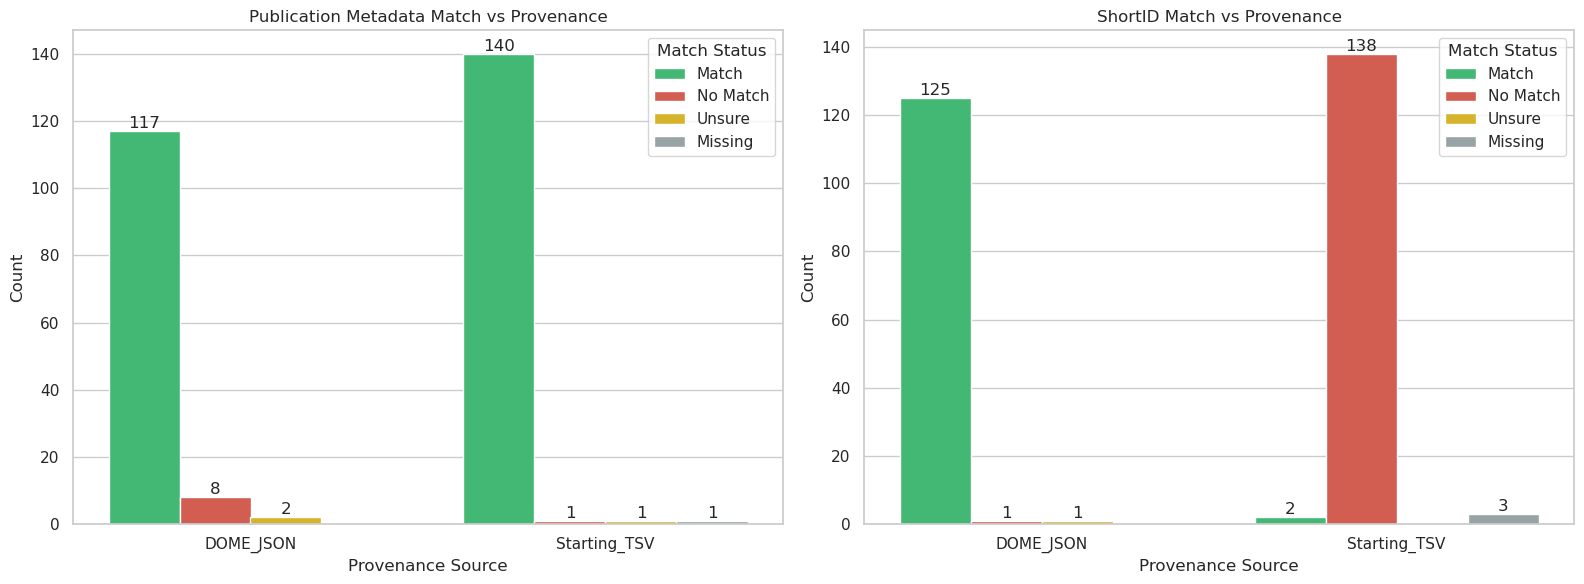

In [11]:
# Create a combined figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Publication Metadata Match
sns.countplot(
    data=df_clean, 
    x='provenance_source', 
    hue='annotation_matches_publication_metadata', 
    ax=axes[0], 
    palette=match_palette,
    hue_order=hue_order
)
axes[0].set_title('Publication Metadata Match vs Provenance')
axes[0].set_xlabel('Provenance Source')
axes[0].set_ylabel('Count')
axes[0].legend(title='Match Status')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plot 2: ShortID Match
sns.countplot(
    data=df_clean, 
    x='provenance_source', 
    hue='annotation_matches_shortid', 
    ax=axes[1], 
    palette=match_palette,
    hue_order=hue_order
)
axes[1].set_title('ShortID Match vs Provenance')
axes[1].set_xlabel('Provenance Source')
axes[1].set_ylabel('Count')
axes[1].legend(title='Match Status')
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
save_path_combined = os.path.join(output_dir, 'combined_annotation_matches_vs_provenance.png')
plt.savefig(save_path_combined)
print(f"Saved combined graph to {save_path_combined}")
plt.show()